In [ ]:
#Question2 on Stochastic gradient descent

#Part A : Data sampling

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# this is how data can be generated
mean =10
std = 1
data_sample = np.random.normal(mean,std,1000)
print(data_sample)
count, bins, ignored = plt.hist(data_sample, 50, normed=True) 
print(count)
print(bins)
print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 

In [ ]:
# Data generated here

# million data points normally distributed
data_size = int(1e6)
m = data_size
x1_list = np.random.normal(3,np.sqrt(4),data_size)
x2_list = np.random.normal(-1,np.sqrt(4),data_size)
noise_list = np.random.normal(0,np.sqrt(2),data_size)
print(noise_list[:10])

# x1_list = sorted(x1_list,key=float)
# pdf1 = stats.norm.pdf(x1_list,3,2)
# x2_list = sorted(x2_list,key=float)
# pdf2 = stats.norm.pdf(x2_list,-1,2)
# noise_list = sorted(noise_list,key=float)
# pdf3 = stats.norm.pdf(noise_list,0,np.sqrt(2))


# plt.plot(x1_list,pdf1)
# plt.plot(x2_list,pdf2)
# plt.plot(noise_list,pdf3)



[[ 2.45720149]
 [ 2.77971911]
 [-0.74885672]
 [ 0.31852988]
 [10.09127105]
 [ 2.08003186]
 [-2.28325881]
 [ 2.04952251]
 [ 7.78019075]
 [10.3896374 ]]


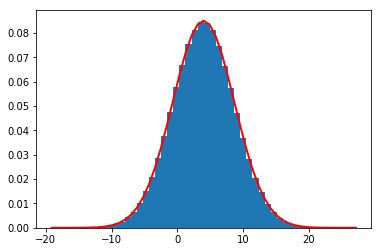

In [3]:
# given theta_vector and x1 and x2 vectors , lets try to see the distribution of yi with error vector 

# 3x1
theta = np.array([[ 3,1,2 ]])
theta = theta.T

# mx1
epsilon = np.array([noise_list])
epsilon = epsilon.T           

# method to add rows in matrix
#theta = np.vstack((theta,np.array([[4]])))
#theta.shape


# mx3
x_vector = np.array([[ 1,x1_list[0], x2_list[0] ]])

# takes a lot of time to append for million data points
#--------------------------------------
# for i in range(len(x1_list)-1):
#     new_sample = np.array([[ 1 , x1_list[i+1], x2_list[i+1]    ]])
#     x_vector = np.vstack( ( x_vector , new_sample ) )

# print(x_vector.shape)    

# y_vector = np.matmul(x_vector,theta) + epsilon
#-----------------------------------------------------



# approach 2, still takes time but lesser
# y_list =[]
# for i in range(len(x1_list)):
#     y_list.append(  theta[0][0]*1 + theta[1][0]*x1_list[i] + theta[2][0]*x2_list[i] + epsilon[i][0]   )

# y_vector = np.array([y_list])
# y_vector = y_vector.T
#--------------------------------------------------------------------


#Approach3 : column appending

x_vector = np.ones((int(1e6),1))

x1_vector = np.array([x1_list])
x1_vector = x1_vector.T

x2_vector = np.array([x2_list])
x2_vector = x2_vector.T

x_vector = np.append( x_vector, x1_vector,axis = 1 )

x_vector = np.append( x_vector, x2_vector,axis = 1 )
y_vector = np.matmul(x_vector,theta) + epsilon




print(y_vector[:10])


mean = np.mean(y_vector)
std = np.std(y_vector)

count, bins, ignored = plt.hist(y_vector, 50, normed=True) 
# print(count)
# print(bins)
# print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 
# it also seems to follow normal distribution with mean (theta.T*X)


In [24]:
def grad_J_theta(x_vec,y_vec,theta):  # X : mx3   ,  Y : mx1   , theta : 3x1
    
    abs_error =  y_vec - x_vec @ theta
    #print(abs_error)
    delta = abs_error.T @ x_vec     # matrix multiplication summation happening here
    delta = delta.T
    cost = (1.0/(2*len(x_vec)))* ( abs_error.T @ abs_error  )
    cost = cost[0][0]
    return cost , delta/len(x_vec)
    


In [62]:
#------------------------ STOCHASTIC GRADIENT DESCENT--------------------------------------------------

# x_vector  : mx3
# y_vector  : mx1

#Initialize theta
theta = np.zeros(3).reshape(3,1)

batch_size = 100
learning_rate = 0.001
total_batches = m//batch_size     # to handle boundry case

#Shuffle the data
x_y_vector = np.append(x_vector,y_vector,axis = 1)
np.random.shuffle(x_y_vector)          # taking time



    


In [ ]:
# Shuffled vectors
x_vector = x_y_vector[:,:3]
y_vector = x_y_vector[:,3:4]

# print(x_vector[:10],y_vector[:10])

b=0
xb = x_vector[ b*batch_size : (b+1)*batch_size ]
yb = y_vector[ b*batch_size : (b+1)*batch_size ]

prev_cost, delta  =  grad_J_theta(xb,yb,theta)
#  print(prev_cost,delta)
theta += learning_rate*delta
curr_cost, delta  =  grad_J_theta(xb,yb,theta)
print(prev_cost-curr_cost)
for i in range(1000):
    
    if abs(prev_cost - curr_cost) < 1e-10:
        break
    for b in range(total_batches):
        # batch number b's data
        if abs(prev_cost - curr_cost) < 1e-10:
            break
        xb = x_vector[ b*batch_size : (b+1)*batch_size ]
        yb = y_vector[ b*batch_size : (b+1)*batch_size ]
        
        prev_cost = curr_cost
        
        theta += learning_rate* delta
        curr_cost, delta = grad_J_theta(xb,yb,theta) 
        #print(b,prev_cost,curr_cost)
        print(theta.T)
        
        
        

In [ ]:
cost ,k  = grad_J_theta(x_vector[:5],y_vector[:5],np.zeros(3).reshape(3,1))
print(cost,k)

In [54]:
theta

array([[2.99825526],
       [1.00069258],
       [2.00005029]])